<a href="https://colab.research.google.com/github/juan84r/Practica_Analisis_De_Datos_Con_Python/blob/main/Segunda_Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive.zip to archive (10).zip
Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')
Ventas mensuales:
Date
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Freq: M, Name: ventas_totales, dtype: int64

Primeros 5 registros como diccionarios:
[{'Transaction ID': 1, 'Date': Timestamp('2023-11-24 00:00:00'), 'Customer ID': 'CUST001', 'Gender': 'Male', 'Age': 34, 'Product Category': 'Beauty', 'Quantity': 3, 'Price per Unit': 50, 'Total Amount': 150, 'ventas_totales': 150}, {'Transaction ID': 2, 'Date': Timestamp('2023-02-27 00:00:00'), 'Customer ID': 'CUST002', 'Gender': 'Female', 'Age': 26, 'Product Category': 'Clothing', 'Quantity': 2, 'Price per Unit': 500, 'Total Amount': 1000, 'ventas_totales': 1000}, {

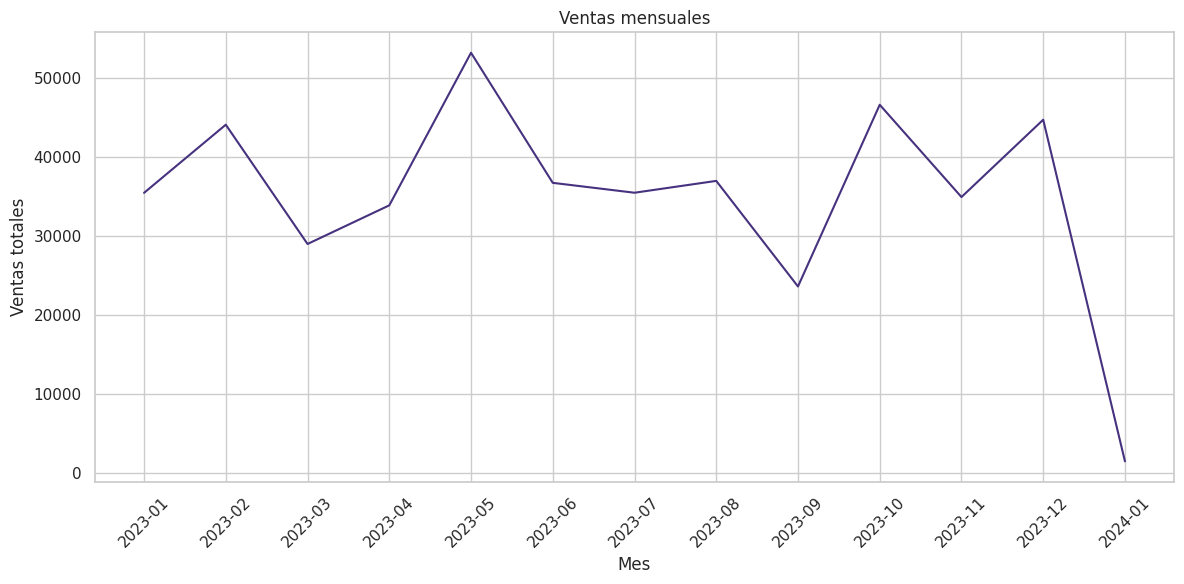

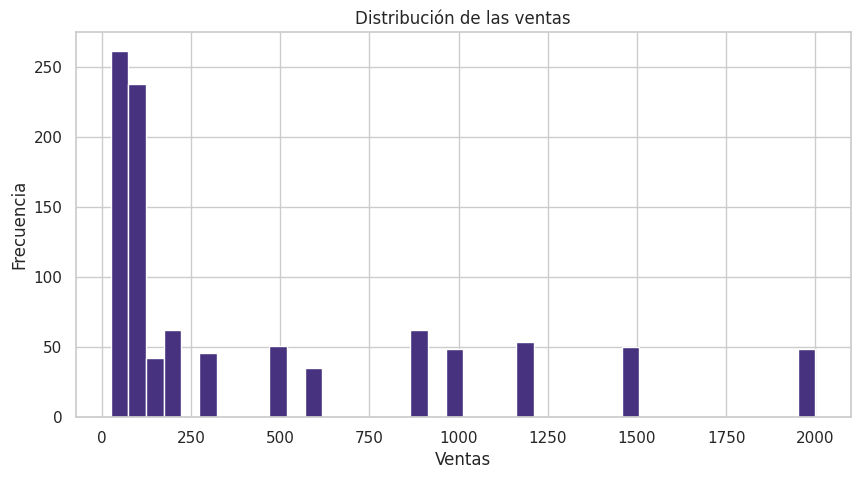

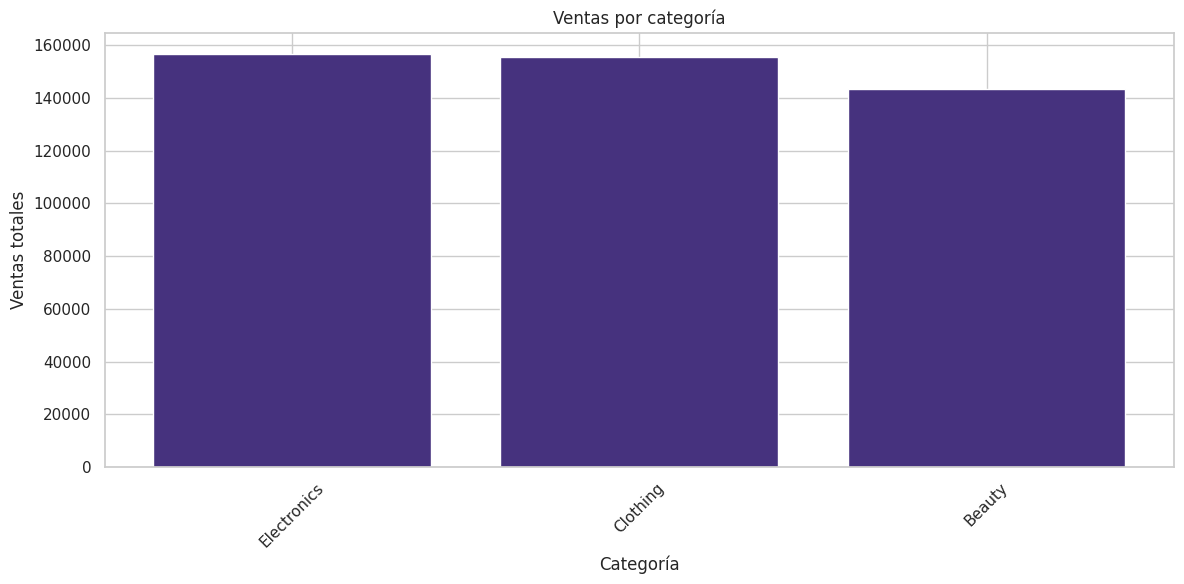


Matriz de correlación:
                Price per Unit  Quantity  ventas_totales
Price per Unit        1.000000  0.017501        0.851925
Quantity              0.017501  1.000000        0.373707
ventas_totales        0.851925  0.373707        1.000000


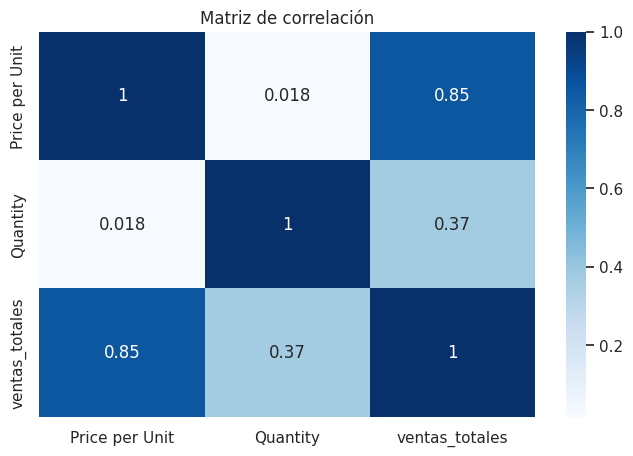

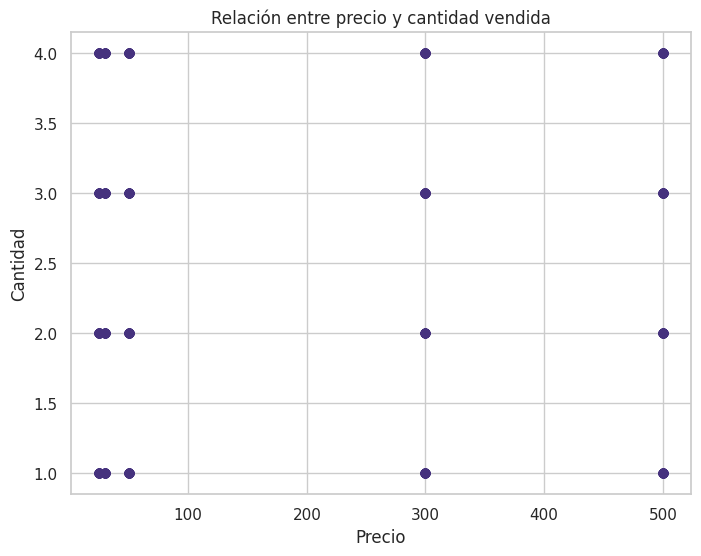


Dataset consolidado final:
   venta_media  venta_mediana  venta_min  venta_max      desvio       varianza
0        456.0          135.0         25       2000  559.997632  313597.347347


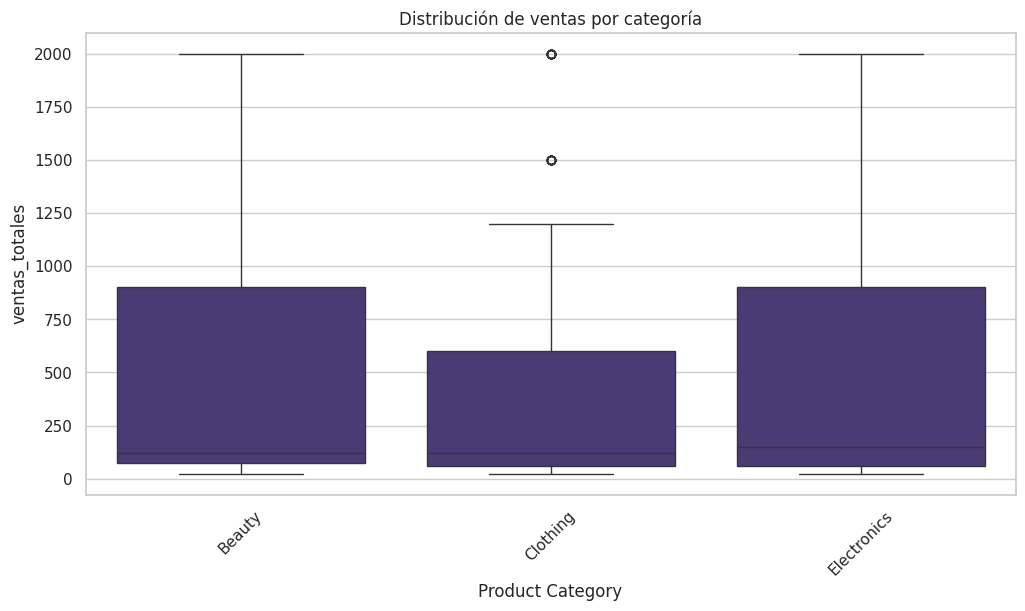

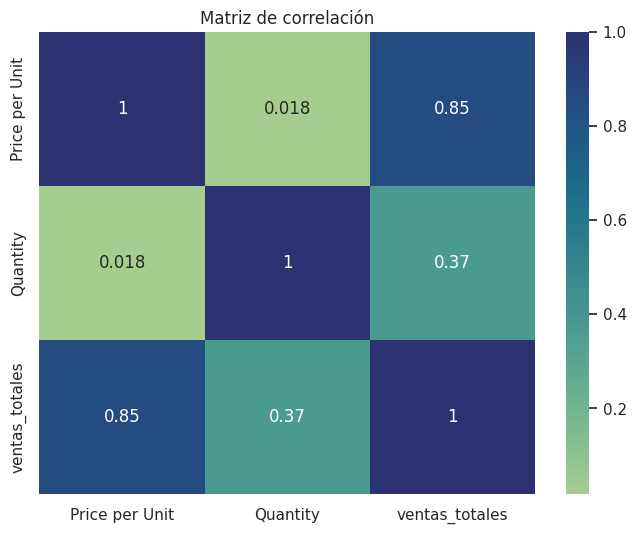

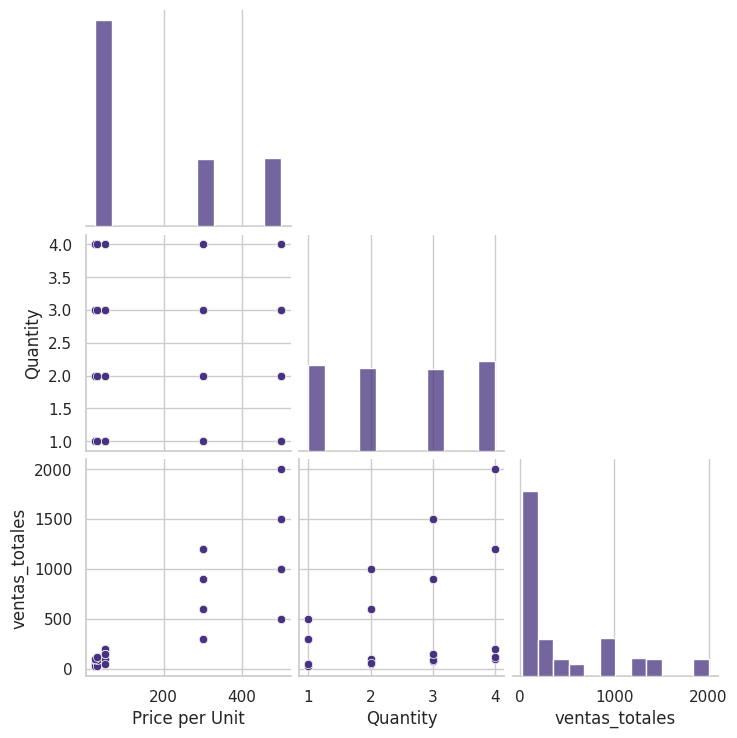

In [ ]:
# PRIMER ENTREGA

# Subir el archivo ZIP a Colab
from google.colab import files
uploaded = files.upload()

# Extraer el contenido del ZIP
import zipfile
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
  zip_ref.extractall()

# Listar archivos en la carpeta actual
import os
os.listdir()

# Cargar el CSV en un DataFrame de Pandas
import pandas as pd
df = pd.read_csv("retail_sales_dataset.csv")
df.head()

# Importar Numpy
import numpy as np

# Ver el nombre de las columnas
print(df.columns)

# Para recalcular:
df['ventas_totales'] = df['Price per Unit'] * df['Quantity']

# O usar directamente 'Total Amount':
df['ventas_totales'] = df['Total Amount']

# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Agrupar por mes y sumar ventas
ventas_mensuales = df.groupby(df['Date'].dt.to_period('M'))['ventas_totales'].sum()
print("Ventas mensuales:")
print(ventas_mensuales)

ventas_lista = df.to_dict('records')
print("\nPrimeros 5 registros como diccionarios:")
print(ventas_lista[:5])

print("\nPrimeras filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas básicas:")
print(df.describe())

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nCantidad de filas duplicadas:")
print(df.duplicated().sum())

# Ver cuantas filas duplicadas hay antes de limpiar
print("Filas duplicadas antes:", df.duplicated().sum())

# Eliminar duplicados
df = df.drop_duplicates()

# Verificar despues
print("Filas duplicadas después:", df.duplicated().sum())

# Ejemplo: limpiar columna 'Product Category'
df['Product Category'] = df['Product Category'].str.strip()  # elimina espacios al inicio y fin
df['Product Category'] = df['Product Category'].str.title()  # convierte la primera letra de cada palabra en mayuscula

#Se eliminaron filas duplicadas y se limpiaron espacios en la columna Product Category.
#Esto garantiza que los calculos de ventas por categoria no tengan errores de repeticion o inconsistencias en los nombres.

# Por ejemplo, productos con ventas totales > 5000
productos_alto_rendimiento = df[df['ventas_totales'] > 5000]

# Ver los primeros registros
productos_alto_rendimiento.head()

# Agrupar por 'Product Category' y sumar las ventas totales
ventas_por_categoria = df.groupby('Product Category')['ventas_totales'].sum().sort_values(ascending=False)
print("Ventas totales por categoría de producto:")
print(ventas_por_categoria)

# ***********************************************************************
#SEGUNDA ENTREGA

# Estadistica descriptiva de las ventas
estadisticas_ventas = df['ventas_totales'].describe()
print("\nEstadística descriptiva de las ventas:")
print(estadisticas_ventas)

varianza = df['ventas_totales'].var()
desvio = df['ventas_totales'].std()
coef_variacion = desvio / df['ventas_totales'].mean()

print("\nVarianza:", varianza)
print("Desvío estándar:", desvio)
print("Coeficiente de variación:", coef_variacion)

# Visualizaciones Exploratorias (Matplotlib)
import matplotlib.pyplot as plt

# Ventas mensuales
ventas_mensuales = df.groupby(df['Date'].dt.to_period('M'))['ventas_totales'].sum()

plt.figure(figsize=(12,6))
plt.plot(ventas_mensuales.index.astype(str), ventas_mensuales.values)
plt.title("Ventas mensuales")
plt.xlabel("Mes")
plt.ylabel("Ventas totales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribucion de ventas
plt.figure(figsize=(10,5))
plt.hist(df['ventas_totales'], bins=40)
plt.title("Distribución de las ventas")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.show()

# Ventas por categoria
plt.figure(figsize=(12,6))
plt.bar(ventas_por_categoria.index, ventas_por_categoria.values)
plt.title("Ventas por categoría")
plt.xlabel("Categoría")
plt.ylabel("Ventas totales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlacion
correlacion = df[['Price per Unit', 'Quantity', 'ventas_totales']].corr()
print("\nMatriz de correlación:")
print(correlacion)

import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(correlacion, annot=True, cmap='Blues')
plt.title("Matriz de correlación")
plt.show()

# Scatter plot precio vs cantidad
plt.figure(figsize=(8,6))
plt.scatter(df['Price per Unit'], df['Quantity'])
plt.title("Relación entre precio y cantidad vendida")
plt.xlabel("Precio")
plt.ylabel("Cantidad")
plt.show()

# Consolidacion de datos
resumen = pd.DataFrame({
    "venta_media": [df['ventas_totales'].mean()],
    "venta_mediana": [df['ventas_totales'].median()],
    "venta_min": [df['ventas_totales'].min()],
    "venta_max": [df['ventas_totales'].max()],
    "desvio": [df['ventas_totales'].std()],
    "varianza": [df['ventas_totales'].var()]
})

print("\nDataset consolidado final:")
print(resumen)

# VISUALIZACION AVANZADA — SEABORN

sns.set(style="whitegrid", palette="viridis")

# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Product Category', y='ventas_totales')
plt.title("Distribución de ventas por categoría")
plt.xticks(rotation=45)
plt.show()

# Heatmap de correlacion
plt.figure(figsize=(8,6))
sns.heatmap(correlacion, annot=True, cmap="crest")
plt.title("Matriz de correlación")
plt.show()

# Pairplot
sns.pairplot(df[['Price per Unit', 'Quantity', 'ventas_totales']], corner=True)
plt.show()

# VISUALIZACION INTERACTIVA — PLOTLY

!pip install plotly

import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

# CORRECCION: convertir Period a string
ventas_mensuales_plotly = ventas_mensuales.reset_index()
ventas_mensuales_plotly['Date'] = ventas_mensuales_plotly['Date'].astype(str)

# Grafico 1: ventas mensuales
fig_line = px.line(
    ventas_mensuales_plotly,
    x='Date',
    y='ventas_totales',
    title="Ventas mensuales"
)

# Grafico 2: ventas por categoria
ventas_cat_plot = ventas_por_categoria.reset_index()
fig_bar = px.bar(
    ventas_cat_plot,
    x='Product Category',
    y='ventas_totales',
    title="Ventas por categoría"
)

# Grafico 3: scatter interactivo
fig_scatter = px.scatter(
    df,
    x='Price per Unit',
    y='Quantity',
    color='Product Category',
    title='Precio vs Cantidad'
)

# Dashboard combinado
dashboard = sp.make_subplots(
    rows=2, cols=2,
    subplot_titles=("Ventas mensuales", "Ventas por categoría", "Precio vs Cantidad"),
    specs=[[{"type": "xy"}, {"type": "xy"}],
           [{"colspan": 2, "type": "xy"}, None]]
)

for trace in fig_line.data:
    dashboard.add_trace(trace, row=1, col=1)

for trace in fig_bar.data:
    dashboard.add_trace(trace, row=1, col=2)

for trace in fig_scatter.data:
    dashboard.add_trace(trace, row=2, col=1)

dashboard.update_layout(height=900, width=1100, title_text="Dashboard Interactivo de Ventas")

dashboard.show()

